In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


### Data exploration

In [3]:
class_df = pd.read_csv("classification.csv")
reg_df_1 = pd.read_csv("regression_1.csv")
reg_df_2 = pd.read_csv("regression_2.csv")

In [4]:
class_df.head()

,x1,x2,label
0,-10.097950,-3.230260,1
1,-2.255579,5.107107,0
2,-10.562037,-3.919005,1
3,-0.126070,3.079037,0
4,-9.249422,-4.100176,1


Text(0.5, 1.0, 'classification')

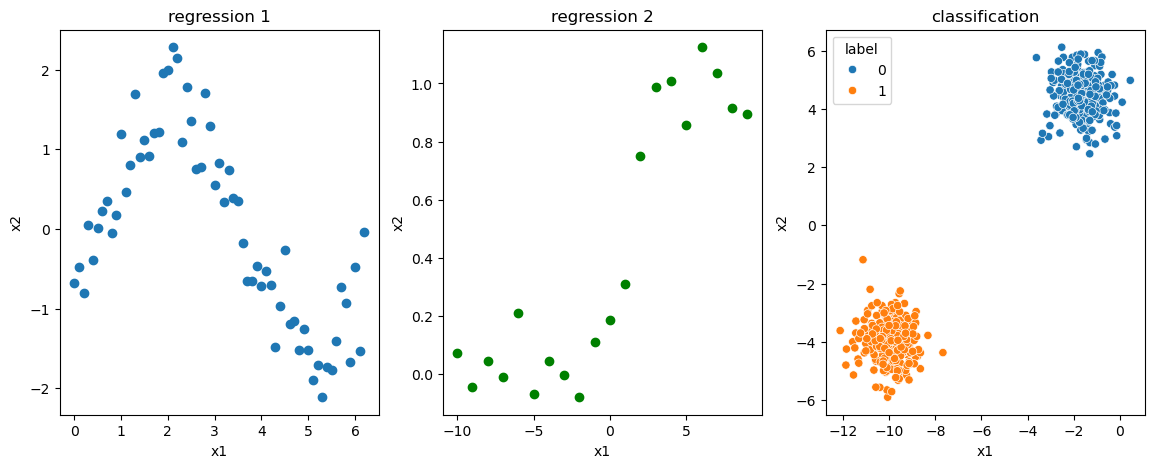

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols= 3, figsize=(14,5))

# data appears nonlinear, almost a signal like structure 
# with considerable fluctutations i.e noise
axes[0].scatter(reg_df_1["x1"], reg_df_1["x2"])
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")
axes[0].set_title("regression 1")

# there is an increasing trend, also in a signal like structure that is noisy
axes[1].plot(reg_df_2["x1"], reg_df_2["x2"], "go")
axes[1].set_ylabel("x2")
axes[1].set_xlabel("x1")
axes[1].set_title("regression 2")

# We definitely obserserve two clear clusters with a clear separation. The data is not 
# noisy
sns.scatterplot(data= class_df, x = "x1", y = "x2", hue = "label", ax=axes[2] )
axes[2].set_title("classification")


### Fitting regression lines

In [73]:
reg_df_1.head()
len(reg_df_1)

63

In [74]:
# starting off with simple regression lines as a test
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()


In [75]:
# sk learn takes on 2d arrays, so we convert our 1d array
reg = linear_reg.fit(reg_df_1["x1"].values.reshape(-1,1), reg_df_1["x2"])

In [76]:
reg.intercept_

1.183998221853486

In [77]:
# lets generate x and y points to draw our regression line based on our trained model
x = np.linspace(reg_df_1["x1"].min(), reg_df_1["x1"].max(),
                100).reshape(-1,1)
y_line = reg.predict(x)


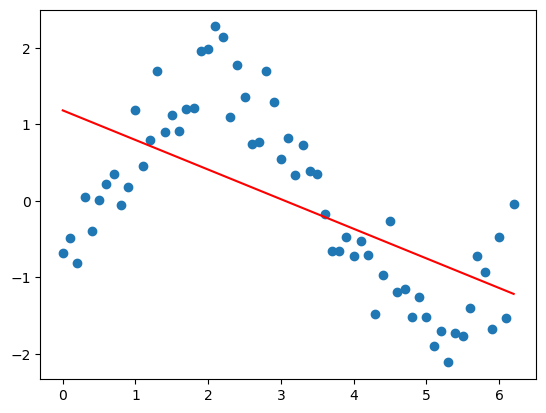

In [ ]:
# plotting
plt.scatter(reg_df_1["x1"], reg_df_1["x2"])
# plot the predicted line
plt.plot(x, y_line, color = "red", label = "Fitted line")

But since our data is non linear, the linear regression plot doesn't really do a great job here. We need a pol

Text(0.5, 1.0, 'regression 1')

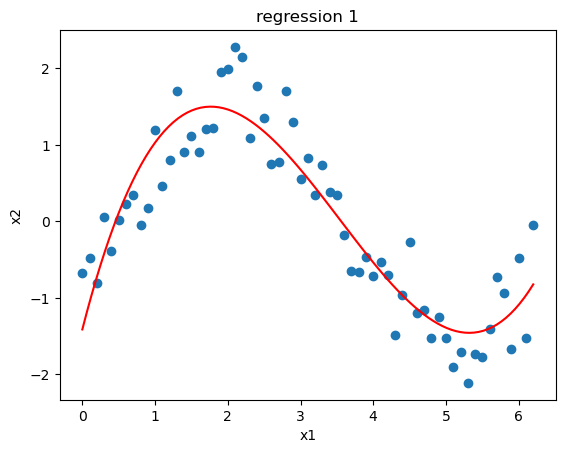

In [146]:
from sklearn.preprocessing import PolynomialFeatures

poly_3 = PolynomialFeatures(degree = 3)
poly_x = poly_3.fit_transform(reg_df_1["x1"].values.reshape(-1,1))

# perform Linear Regression on polynomial data
model = LinearRegression()
model.fit(poly_x, reg_df_1["x2"])

# convert our previously taken points to polynomial form
x_line_1 = np.linspace(reg_df_1["x1"].min(), reg_df_1["x1"].max(), 100).reshape(-1,1)
x_line_poly = poly_3.transform(x_line_1)
y_line_1 = model.predict(x_line_poly)


plt.scatter(reg_df_1["x1"], reg_df_1["x2"])

# plot the predicted line
plt.plot(x_line_1, y_line, color = "red", label = "Fitted line")
plt.ylabel("x2")
plt.xlabel("x1")
plt.title("regression 1")

Text(0.5, 0, 'x1')

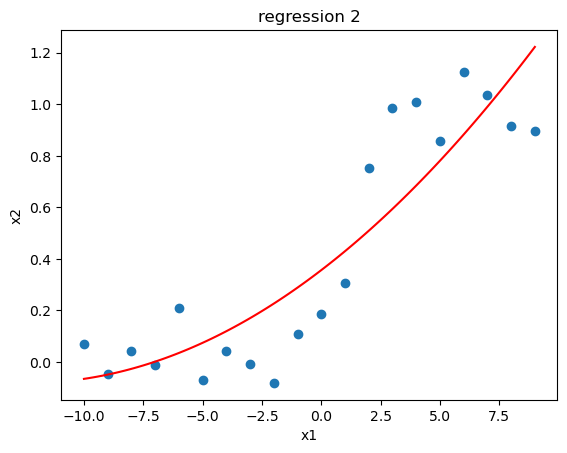

In [145]:
poly_2 = PolynomialFeatures(2)
poly_x_2 = poly_2.fit_transform(reg_df_2["x1"].values.reshape(-1,1))

# train model using the transformed x
model_2 = LinearRegression()
model_2.fit(poly_x_2, reg_df_2["x2"])

x_line_2 = np.linspace(reg_df_2["x1"].min(), reg_df_2["x1"].max(), 100).reshape(-1, 1)
x_line_poly_2 = poly_2.transform(x_line_2)
y_line_2 = model_2.predict(x_line_poly_2)

plt.scatter(reg_df_2["x1"], reg_df_2["x2"])
plt.plot(x_line_2, y_line_2, color = "red")

plt.title("regression 2")
plt.ylabel("x2")
plt.xlabel("x1")

In [122]:
class_df

,x1,x2,label
0,-10.097950,-3.230260,1
1,-2.255579,5.107107,0
2,-10.562037,-3.919005,1
3,-0.126070,3.079037,0
4,-9.249422,-4.100176,1
...,...,...,...
495,-10.392365,-3.890568,1
496,-9.143800,-4.747003,1
497,-10.010185,-4.373446,1
498,-2.262481,4.878788,0


In [123]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

X = class_df[["x1", "x2"]]
Y = class_df["label"]

logisticRegr.fit(X, Y)

LogisticRegression()

c:\Users\hridi\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'x1')

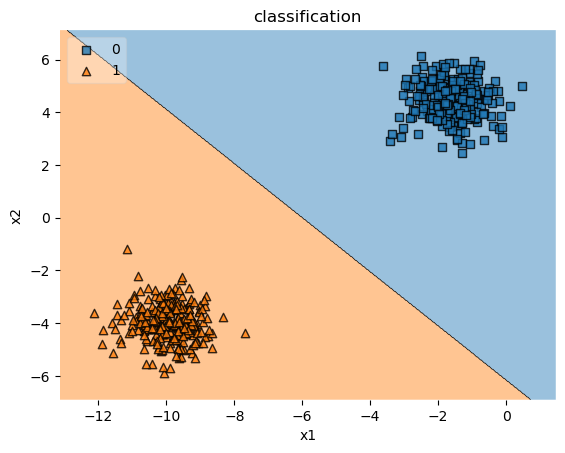

In [142]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions


svm = SVC(kernel="poly",degree= 1)
svm.fit(X,Y)

plot_decision_regions(X.to_numpy(),np.asarray(Y),clf=svm,legend=2)
plt.title("classification")
plt.ylabel("x2")
plt.xlabel("x1")

### Combined plot

c:\Users\hridi\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'classification'}, xlabel='x1', ylabel='x2'>

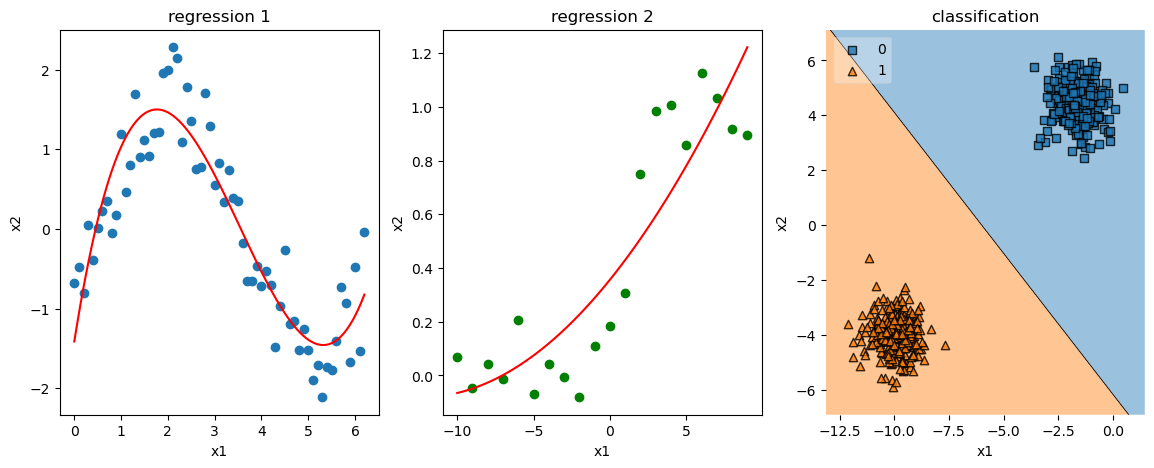

In [137]:
fig, axes = plt.subplots(nrows = 1,ncols= 3, figsize=(14,5))

# data appears nonlinear, almost a signal like structure 
# with considerable fluctutations i.e noise
axes[0].scatter(reg_df_1["x1"], reg_df_1["x2"])
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")
axes[0].set_title("regression 1")
axes[0].plot(x_line_1, y_line, color = "red")



axes[1].plot(reg_df_2["x1"], reg_df_2["x2"], "go")
axes[1].set_ylabel("x2")
axes[1].set_xlabel("x1")
axes[1].set_title("regression 2")
axes[1].plot(x_line_2, y_line_2, color = "red")

# We definitely obserserve two clear clusters with a clear separation. The data is not 
# noisy
# sns.scatterplot(data= class_df, x = "x1", y = "x2", hue = "label", ax=axes[2] )
axes[2].set_title("classification")
axes[2].set_ylabel("x2")
axes[2].set_xlabel("x1")
plot_decision_regions(X.to_numpy(),np.asarray(Y),clf=svm,legend=2)